In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Flatten,Dropout
import matplotlib.pyplot as plt

df = pd.read_pickle("../input/fordadata/data.pkl")
df.head()

,dim_0,labels
0,"[-0.79717168, -0.66439208, -0.37301463, 0.0408...",-1
1,"[0.80485472, 0.63462859, 0.37347448, 0.0383434...",1
2,"[0.7279851, 0.11128392, -0.49912439, -1.068629...",-1
3,"[-0.23443909, -0.50215697, -0.73248781, -0.946...",-1
4,"[-0.17132785, -0.062285311, 0.235829, 0.710395...",-1


In [2]:
X = pd.DataFrame(df.dim_0.tolist())
X = X.to_numpy()
input_x = []
for array in X:
    array = np.reshape(array,(500,1))
    input_x.append(array)
input_x = np.array(input_x)

y = df["labels"].to_numpy(dtype=int)

In [3]:
# def dimenstion_mod(x):
#     a = list()
#     for i in range(x.shape[0]):
#         a.append(x[i])
#     a = np.array(a) 
#     return np.reshape(a, (a.shape[0], a.shape[1],1))

In [4]:
# X =  df[df.columns.drop("labels")].to_numpy()
# y = df["labels"].to_numpy(dtype=int)

y = np.where(y == -1, 0, y)

X_train, X_val, y_train, y_val = train_test_split(input_x, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

# X_train = dimenstion_mod(X_train)
# X_val = dimenstion_mod(X_val)
# X_test = dimenstion_mod(X_test)

In [5]:
model = Sequential()
model.add(LSTM(100,
            return_sequences=True,
            input_shape=(X_train.shape[1],1)))
model.add(LSTM(200, return_sequences=True))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
#model.add(LSTM(20))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

2022-05-23 14:40:17.221457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 14:40:17.393543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 14:40:17.394744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 14:40:17.396480: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
history = model.fit(X_train,y_train,epochs=200, validation_data=(X_val, y_val), validation_steps = 20 ,batch_size=100)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5,1,0)

2022-05-23 14:40:21.692297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-05-23 14:40:25.953897: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


32/32 [==============================] - 10s 127ms/step - loss: 0.6396 - val_loss: 0.6184
Epoch 2/200
32/32 [==============================] - 3s 84ms/step - loss: 0.5549
Epoch 3/200
32/32 [==============================] - 3s 84ms/step - loss: 0.5148
Epoch 4/200
32/32 [==============================] - 3s 84ms/step - loss: 0.4475
Epoch 5/200
32/32 [==============================] - 3s 84ms/step - loss: 0.3998
Epoch 6/200
32/32 [==============================] - 3s 84ms/step - loss: 0.3451
Epoch 7/200
32/32 [==============================] - 3s 84ms/step - loss: 0.2840
Epoch 8/200
32/32 [==============================] - 3s 84ms/step - loss: 0.2140
Epoch 9/200
32/32 [==============================] - 3s 84ms/step - loss: 0.1746
Epoch 10/200
32/32 [==============================] - 3s 85ms/step - loss: 0.1202
Epoch 11/200
32/32 [==============================] - 3s 86ms/step - loss: 0.0799
Epoch 12/200
32/32 [==============================] - 3s 84ms/step - loss: 0.0780
Epoch 13/200
32/

In [7]:
conf_mat = metrics.confusion_matrix(y_test, y_pred[:,0])
balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred[:,0])
print(conf_mat)
print(balanced_accuracy)

[[330  75]
 [ 81 302]]
0.8016632820810367


dict_keys(['loss', 'val_loss'])


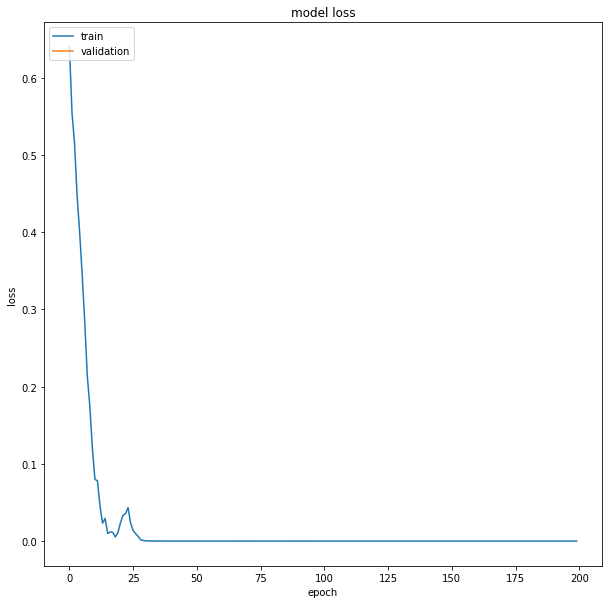

In [8]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
import plotly.figure_factory as ff
import plotly.express as px

x = ['1', '-1']
y =  ['1', '-1']

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in conf_mat]

# set up figure 
fig = px.imshow(conf_mat, x=x, y=y, color_continuous_scale='Viridis', aspect="auto")
fig.update_traces(text=z_text, texttemplate="%{text}")

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>', title_font=dict(color="black",size=20),
                  title_x=0.5, title_y=0.95)

# # add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=20), x=0.5, y=-0.15, showarrow=False,
                        text="Predicted value", xref="paper", yref="paper"))

# # add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=20), x=-0.05, y=0.5, showarrow=False,
                        text="Real value", textangle=-90, xref="paper", yref="paper"))

fig.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
